In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vth = 2
VGS = np.linspace(30,2,1000)
VDS = np.linspace(0,20,100)

IDS = np.zeros([len(VGS), len(VDS)])

alpha = 0

for i in range(len(VGS)):
    temp_IDS =(VGS[i] - Vth - VDS/2)*VDS
    IDS[i,:] = temp_IDS
    inds = np.where(temp_IDS == max(temp_IDS))[0][0]
    IDS[i,inds:]=max(temp_IDS) + alpha*(VDS[inds:] - VDS[inds])/VGS[i]


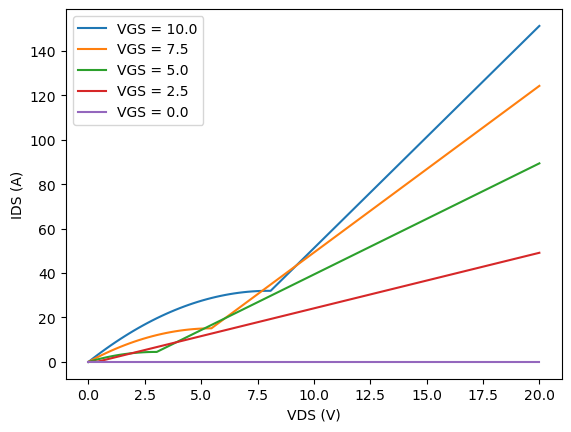

In [99]:
Vth = 2
VGS = np.linspace(10,0,5)
VDS = np.linspace(0,20,100)

IDS = np.zeros([len(VGS), len(VDS)])

alpha = 1

for i in range(len(VGS)):
    temp_IDS =(VGS[i] - Vth - VDS/2)*VDS
    IDS[i,:] = temp_IDS
    inds = np.where(temp_IDS == max(temp_IDS))[0][0]
    IDS[i,inds:]=max(temp_IDS) + alpha*VGS[i]*(VDS[inds:] - VDS[inds])

plt.figure()
for i in range(len(VGS)):
    plt.plot(VDS, IDS[i,:], label=f'VGS = {VGS[i]}')
plt.legend()
plt.xlabel('VDS (V)')
plt.ylabel('IDS (A)')
plt.show()


(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64),)


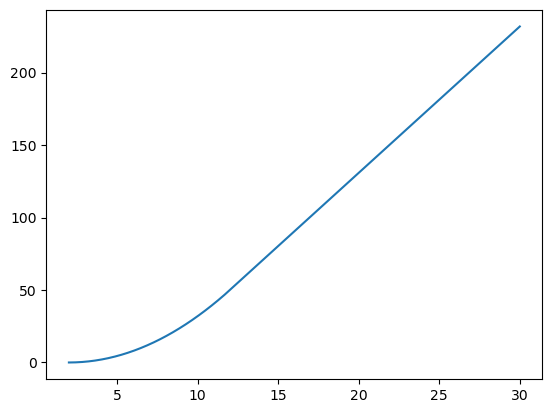

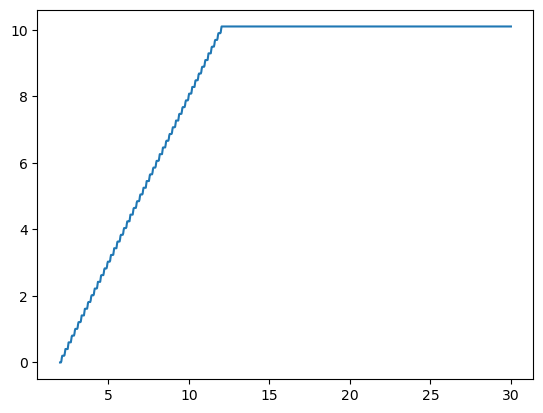

In [2]:
print(np.where(VDS>10))
to_plot = IDS[:,50]
plt.figure()
plt.plot(VGS,to_plot)
plt.show()
plt.figure()
plt.plot(VGS, np.gradient(to_plot,VGS))

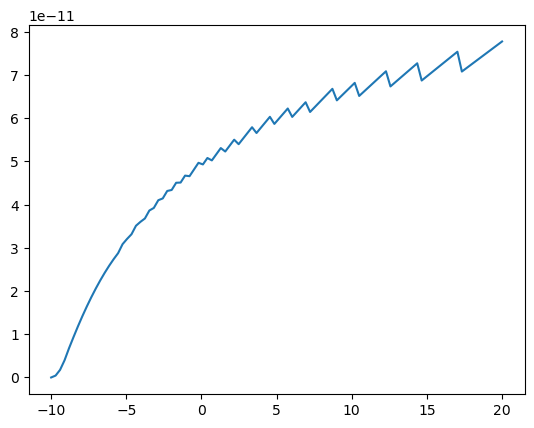

In [119]:
def my_fit(VGS,Rc,Vth,alpha,wanted_VDS):
    VSc = np.linspace(0,20,1000)
    IDS = np.zeros([len(VGS), len(VSc)])
    VDS = np.zeros([len(VGS), len(VSc)])

    for i in range(len(VGS)):
        temp_IDS =alpha * (VGS[i] - Vth - VSc/2)*VSc
        IDS[i,:] = temp_IDS
        inds = np.where(temp_IDS == max(temp_IDS))[0][0]
        IDS[i,inds:]=max(temp_IDS)
        VDS[i,:] = VSc + 2*Rc*IDS[i,:]

    inds = np.argmin(abs(VDS-wanted_VDS), axis = 1)
    IDS_to_plot = 0*VGS
    VSc_for_VDS = 0*VGS
    for i in range(len(IDS_to_plot)):
        IDS_to_plot[i] = IDS[i,inds[i]]
        VSc_for_VDS[i] = VSc[inds[i]]

    return IDS_to_plot
my_VGS = np.linspace(20,-10,102)
plt.figure()
plt.plot(my_VGS,my_fit(my_VGS,0.5*1e10,-10,1e-11,1))
plt.show()
